# Objective

To predict whether a patient will survive or not after 5 years of the surgery based on various
features like Age,year of operation,positive axillary nodes.


### Description

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### 1) Attribute Information:

   1) Age of patient at time of operation (numerical)
   
   2) Patient's year of operation (year - 1900, numerical)
   
   3) Number of positive axillary nodes detected (numerical)
   
   4) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [2]:
# import necessary packages..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset..
cancer_df=pd.read_csv('haberman.csv',names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
# Printing first few rows of dataset..
print(cancer_df.head());

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [13]:
# Displaying the number of rows,columns along with their names and other info related to attributes....
print(cancer_df.info());


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


#### Conclusion
Clearly we can see that,

1) 306 data points

2) 4 features ('age', 'year_of_treatment', 'positive_lymph_nodes',    'survival_status_after_5_years')

3) No missing values in dataset.


In [14]:
# Listing the unique class attribute values
print(cancer_df["survival_status_after_5_years"].unique())

[1 2]


#### Conclusion

The values of 'survival_status_after_5_years' column are not meanigful. Hence they need to be mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years).

In [15]:
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].map({1:"yes", 2:"no"})
print(cancer_df.head());


   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


## 2) High Level Statistics

In [16]:
print(cancer_df.describe())

              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


In [17]:
print("Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Target variable distribution
yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
**************************************************
yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


## Observations

1) From the above results we can conclude that around 74% of the patients survived after 5 years of the surgery and 24% did not.
2) The age of the patients vary from 30 to 83 with the mean of 52.

3) Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes .

4) The given dataset is not a balanced dataset.

## 3) Univariate analysis

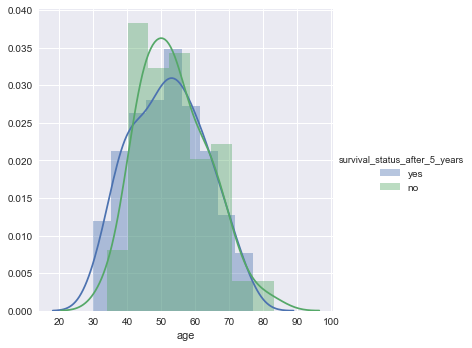

In [19]:
#3.1 Distribution plots...pdf
sns.FacetGrid(cancer_df,hue='survival_status_after_5_years',size=5) \
    .map(sns.distplot,'age')\
    .add_legend();
plt.show();

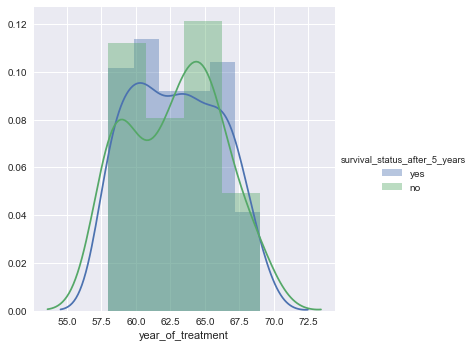

In [20]:
#3.2
sns.FacetGrid(cancer_df,hue='survival_status_after_5_years',size=5) \
    .map(sns.distplot,'year_of_treatment')\
    .add_legend();
plt.show();

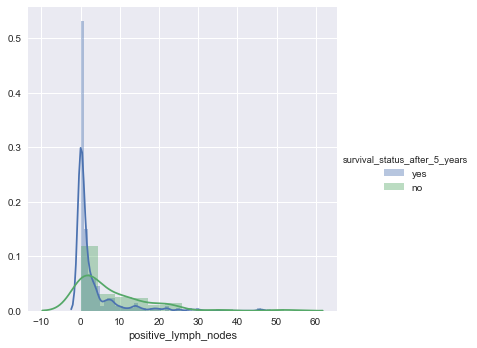

In [21]:
#3.3
sns.FacetGrid(cancer_df,hue='survival_status_after_5_years',size=5) \
    .map(sns.distplot,'positive_lymph_nodes')\
    .add_legend();
plt.show();

[ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]
[ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]


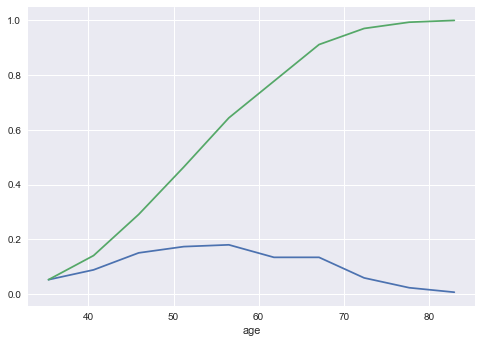

AttributeError: module 'seaborn' has no attribute 'add_legend'

In [5]:
##3.4 cumulative density functions.....
counts, bin_edges = np.histogram(cancer_df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(counts)
#print(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')


plt.show();


[ 0.20588235  0.09150327  0.08496732  0.0751634   0.09803922  0.10130719
  0.09150327  0.09150327  0.08169935  0.07843137]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


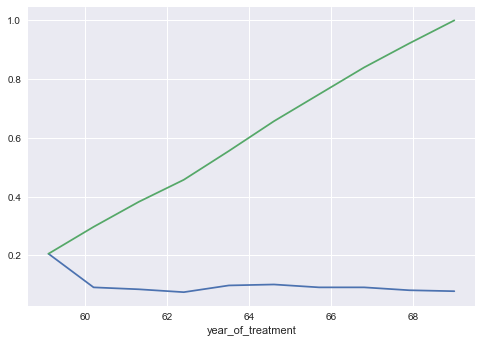

In [29]:
#3.5
counts, bin_edges = np.histogram(cancer_df['year_of_treatment'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year_of_treatment')


plt.show();

[ 0.77124183  0.09803922  0.05882353  0.02614379  0.02941176  0.00653595
  0.00326797  0.          0.00326797  0.00326797]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


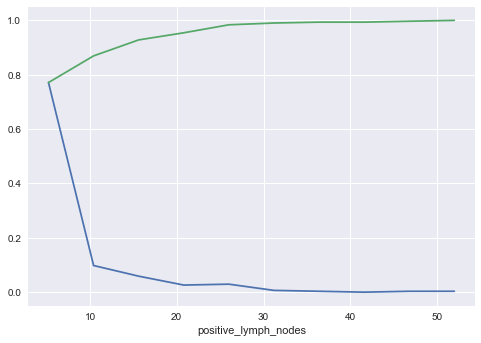

In [31]:
#3.6
counts, bin_edges = np.histogram(cancer_df['positive_lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('positive_lymph_nodes')


plt.show();

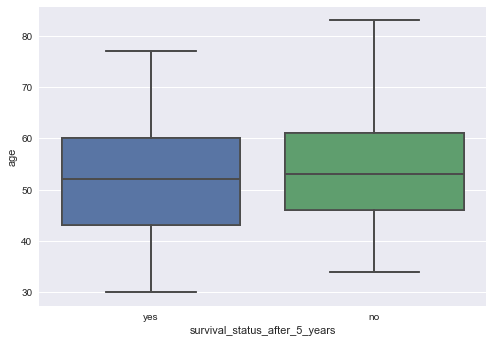

In [35]:
#box plots..
#3.7
sns.boxplot(x='survival_status_after_5_years',y='age',data=cancer_df)
plt.show()

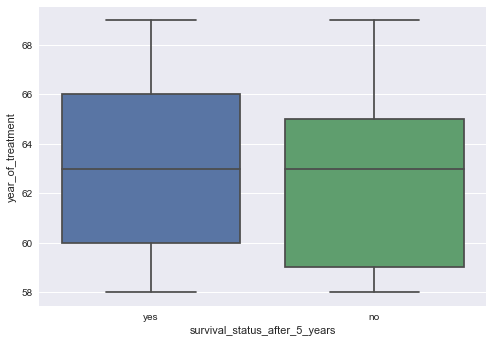

In [36]:
#3.8
sns.boxplot(x='survival_status_after_5_years',y='year_of_treatment',data=cancer_df)
plt.show()

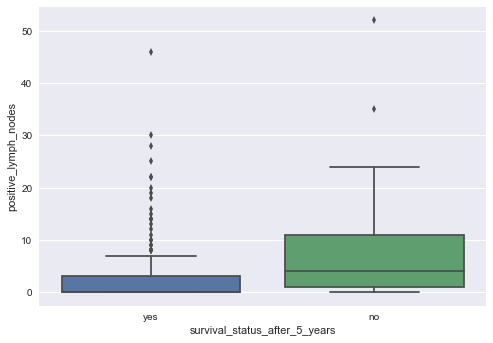

In [37]:

#3.9
sns.boxplot(x='survival_status_after_5_years',y='positive_lymph_nodes',data=cancer_df)
plt.show()

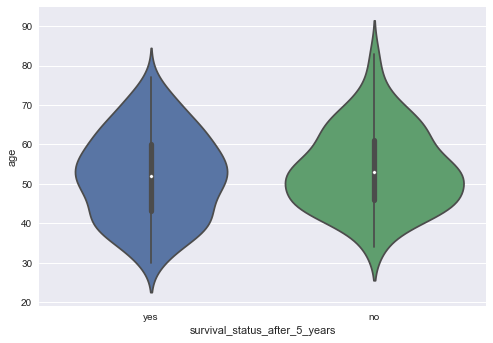

In [42]:
#3.10 violin plots.....
sns.violinplot(x="survival_status_after_5_years", y="age", data=cancer_df, size=1)
plt.show()

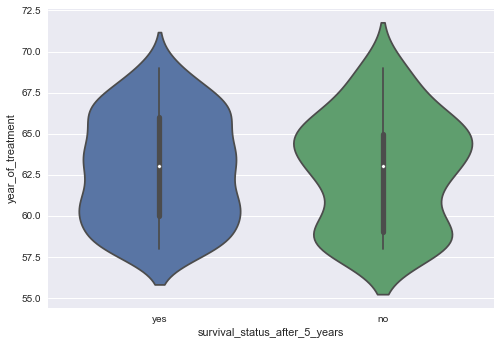

In [47]:
# 3.11
sns.violinplot(x="survival_status_after_5_years", y="year_of_treatment", data=cancer_df, size=1)
plt.show()

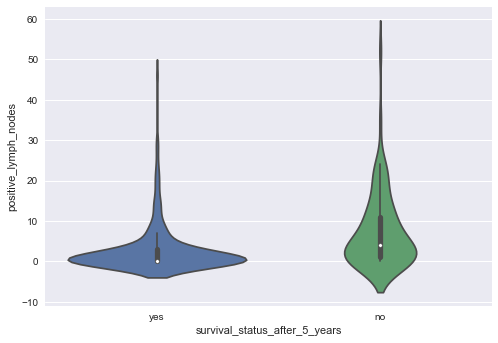

In [46]:
#3.11
sns.violinplot(x="survival_status_after_5_years", y="positive_lymph_nodes", data=cancer_df, size=5)
plt.show()

###  Observations

  1)The number of positive lymph nodes of the survivors is highly densed from 0 to 5. (#3.3)[Histograms and pdf]
    
  2) Almost 80% of the patients have less than or equal to 5 positive lymph nodea. (#3.6)[cdf]
    
  3) The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before      1959 have the slighlty lower chance to surive that the rest. (#3.8 and #3.11)[violin and box plots]



# 4 Multivariate Analysis

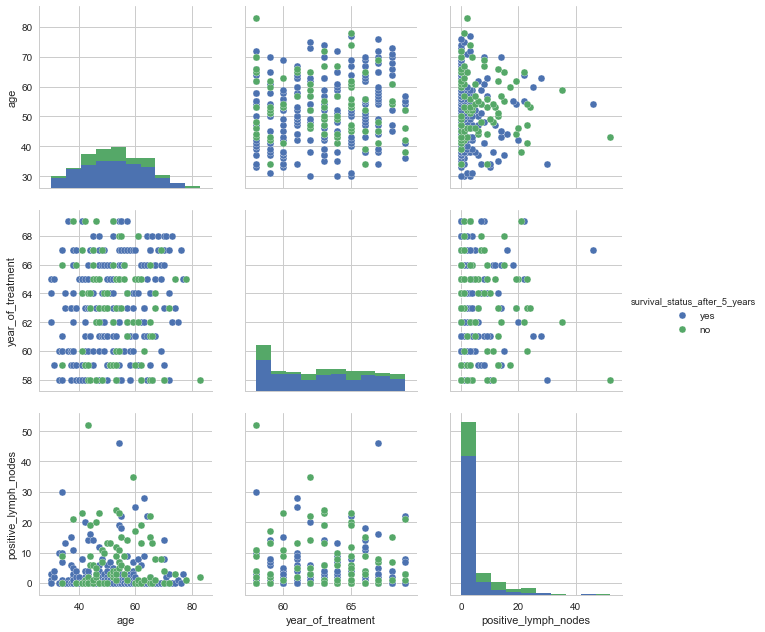

In [48]:
#pair plots....
sns.set_style("whitegrid");
sns.pairplot(cancer_df, hue="survival_status_after_5_years", size=3);
plt.show()


# Observation

There is no separation between the datapoints when they are scattered on pair plots...hence can't conclude anything.